## Imports

In [71]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os.path
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from scipy import spatial

## Settings

In [72]:
im1_dir = '/home/drevital/obstacles_classification_datasets/rgb_6_J/eval/obstacle'
im1_name = '117_1276_.95_2021-08-16--11-34-41_.jpg'
im2_dir = '/home/drevital/obstacles_classification_datasets/rgb_6_J/train/no_obstacle'
im2_name = '117_1406_.82_2021-08-16--11-34-55_.jpg'
im_height = 200
im_width = 400

## Read Images

In [73]:
im1 = tf.io.read_file(os.path.join(im1_dir, im1_name))
im1 = tf.io.decode_jpeg(im1, channels=3)
im1_src = im1
im1 = tf.image.resize_with_pad(im1, 224, 224)
# Convert to shape (1, 224, 224, 3) float
im1  = tf.image.convert_image_dtype(im1, tf.float32)[tf.newaxis, ...]

im2 = tf.io.read_file(os.path.join(im2_dir, im2_name))
im2 = tf.io.decode_jpeg(im2, channels=3)
im2_src = im2
im2 = tf.image.resize_with_pad(im2, 224, 224)
# Convert to shape (1, 224, 224, 3) float
im2  = tf.image.convert_image_dtype(im2, tf.float32)[tf.newaxis, ...]

## Load the MobileNet Module

In [74]:
module_handle = 'https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4'
module = hub.load(module_handle)

## Calculate the Feature Vectors

In [75]:
f1 = module(im1)   
f1_set = np.squeeze(f1)  
f2 = module(im2)   
f2_set = np.squeeze(f2)  

In [76]:
f1_set, f1_set.shape

(array([0.04239863, 0.40547407, 0.        , ..., 0.15316822, 0.        ,
        1.8711033 ], dtype=float32),
 (1792,))

In [77]:
f2_set, f2_set.shape

(array([0.06953786, 0.15676503, 0.        , ..., 0.527915  , 0.00323951,
        1.0085839 ], dtype=float32),
 (1792,))

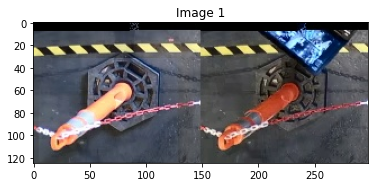

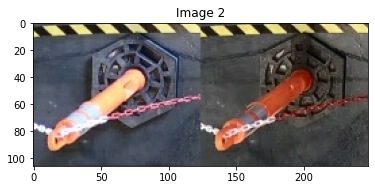

In [78]:
im1 = cv2.cvtColor(im1_src.numpy(), cv2.COLOR_RGB2RGBA)
plt.imshow(im1)
plt.title('Image 1')
plt.show() 

im2 = cv2.cvtColor(im2_src.numpy(), cv2.COLOR_RGB2RGBA)
plt.imshow(im2)
plt.title('Image 2')
plt.show() 

In [79]:
similarity = 1 - spatial.distance.cosine(f1_set, f2_set)

In [80]:
similarity

0.8726309537887573

In [82]:
im1[100][:10]

array([[ 70,  75,  78, 255],
       [ 67,  72,  75, 255],
       [ 70,  71,  76, 255],
       [ 71,  71,  79, 255],
       [ 74,  77,  86, 255],
       [ 84,  88, 100, 255],
       [ 81,  89, 102, 255],
       [ 84,  91, 109, 255],
       [ 78,  85, 103, 255],
       [ 74,  81,  99, 255]], dtype=uint8)